In [1]:
#import all libraries needed
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('/Users/andrewacosta/Downloads/cleaned_data.csv')

In [3]:
data.head()

,Unnamed: 0,Player,Ht,Wt,Colleges,Pos,Age,Tm,G,GS,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,Alaa Abdelnaby,6-10,240.0,Duke,PF,22,POR,43,0,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
1,1,Danny Ainge,6-4,175.0,BYU,SG,31,POR,80,0,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
2,2,Mark Bryant,6-9,245.0,Seton Hall,PF,25,POR,53,0,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
3,3,Wayne Cooper,6-10,220.0,New Orleans,C,34,POR,67,1,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
4,4,Walter Davis,6-6,193.0,UNC,SG,36,POR,71,14,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47


In [4]:
#fix column headers

In [5]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [6]:
data = data.drop(['unnamed:_0'], axis = 1)

In [7]:
#explore/clean data

In [8]:
data.shape

(17976, 44)

In [9]:
data.describe()

,wt,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,pts_won,pts_max,share,w,l,w/l%,gb,ps/g,pa/g,srs
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,...,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,215.879395,26.678961,54.055685,27.303238,20.496584,3.207682,7.033600,0.441621,0.446495,1.294309,...,6.388679,39.745160,0.006065,39.731809,40.399366,0.495715,15.840065,102.351307,102.489047,-0.132477
std,27.289579,4.089597,25.253982,29.975434,10.100926,2.286849,4.713654,0.094456,0.634589,1.677156,...,63.918459,202.645066,0.058911,12.816527,12.783673,0.154865,13.047137,7.262327,7.302082,4.511820
min,133.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000
25%,195.000000,23.000000,35.000000,1.000000,12.100000,1.400000,3.300000,0.405000,0.000000,0.000000,...,0.000000,0.000000,0.000000,30.000000,31.000000,0.378000,4.000000,96.900000,97.100000,-3.260000
50%,215.000000,26.000000,62.000000,12.000000,20.000000,2.700000,5.900000,0.446000,0.100000,0.500000,...,0.000000,0.000000,0.000000,41.000000,40.000000,0.512000,14.000000,101.800000,102.500000,-0.010000
75%,235.000000,29.000000,77.000000,55.000000,29.000000,4.600000,9.900000,0.488000,0.700000,2.100000,...,0.000000,0.000000,0.000000,50.000000,50.000000,0.610000,25.000000,107.700000,107.600000,3.130000
max,360.000000,44.000000,85.000000,84.000000,43.700000,13.400000,27.800000,1.000000,5.300000,13.200000,...,1310.000000,1310.000000,1.000000,73.000000,72.000000,0.890000,56.000000,126.500000,130.800000,11.800000


In [10]:
data.isnull().sum()

player      0
ht          0
wt          0
colleges    0
pos         0
age         0
tm          0
g           0
gs          0
mp          0
fg          0
fga         0
fg%         0
3p          0
3pa         0
3p%         0
2p          0
2pa         0
2p%         0
efg%        0
ft          0
fta         0
ft%         0
orb         0
drb         0
trb         0
ast         0
stl         0
blk         0
tov         0
pf          0
pts         0
year        0
pts_won     0
pts_max     0
share       0
team        0
w           0
l           0
w/l%        0
gb          0
ps/g        0
pa/g        0
srs         0
dtype: int64

In [11]:
data.dtypes

player       object
ht           object
wt          float64
colleges     object
pos          object
age           int64
tm           object
g             int64
gs            int64
mp          float64
fg          float64
fga         float64
fg%         float64
3p          float64
3pa         float64
3p%         float64
2p          float64
2pa         float64
2p%         float64
efg%        float64
ft          float64
fta         float64
ft%         float64
orb         float64
drb         float64
trb         float64
ast         float64
stl         float64
blk         float64
tov         float64
pf          float64
pts         float64
year        float64
pts_won     float64
pts_max     float64
share       float64
team         object
w             int64
l             int64
w/l%        float64
gb          float64
ps/g        float64
pa/g        float64
srs         float64
dtype: object

In [12]:
data['year'].value_counts()

2021.0    541
2018.0    541
2019.0    530
2020.0    529
2015.0    497
2014.0    492
2017.0    489
2012.0    485
2016.0    479
2013.0    477
2005.0    467
2007.0    463
2006.0    462
2011.0    457
2008.0    456
1997.0    451
1999.0    451
1998.0    450
2009.0    450
2010.0    447
2002.0    446
2000.0    446
2001.0    445
2004.0    444
1996.0    441
2003.0    434
1995.0    417
1994.0    412
1991.0    399
1993.0    399
1992.0    395
1990.0    393
1989.0    365
1987.0    344
1988.0    341
1986.0    338
1985.0    332
1983.0    325
1982.0    323
1984.0    320
1981.0    310
1980.0    293
Name: year, dtype: int64

In [13]:
data.head()

,player,ht,wt,colleges,pos,age,tm,g,gs,mp,...,pts_max,share,team,w,l,w/l%,gb,ps/g,pa/g,srs
0,Alaa Abdelnaby,6-10,240.0,Duke,PF,22,POR,43,0,6.7,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
1,Danny Ainge,6-4,175.0,BYU,SG,31,POR,80,0,21.4,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
2,Mark Bryant,6-9,245.0,Seton Hall,PF,25,POR,53,0,14.7,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
3,Wayne Cooper,6-10,220.0,New Orleans,C,34,POR,67,1,11.1,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
4,Walter Davis,6-6,193.0,UNC,SG,36,POR,71,14,20.9,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47


In [15]:
#change target album from displaying exact number of mvp point won to yes or no column depicting if a player got 
#mvp votes or not

In [16]:
def clean_mvp(x):
    if x > 0:
        return 'yes'
    else: 
        return 'no'

In [17]:
list(map(clean_mvp, data['pts_won']))

['no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 '

In [18]:
data['pts_won'] = list(map(clean_mvp, data['pts_won']))

In [19]:
data['pts_won'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
data.head()

,player,ht,wt,colleges,pos,age,tm,g,gs,mp,...,pts_max,share,team,w,l,w/l%,gb,ps/g,pa/g,srs
0,Alaa Abdelnaby,6-10,240.0,Duke,PF,22,POR,43,0,6.7,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
1,Danny Ainge,6-4,175.0,BYU,SG,31,POR,80,0,21.4,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
2,Mark Bryant,6-9,245.0,Seton Hall,PF,25,POR,53,0,14.7,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
3,Wayne Cooper,6-10,220.0,New Orleans,C,34,POR,67,1,11.1,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47
4,Walter Davis,6-6,193.0,UNC,SG,36,POR,71,14,20.9,...,0.0,0.0,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47


In [21]:
#use of plots to visualize the data

<AxesSubplot:xlabel='pts_won', ylabel='count'>

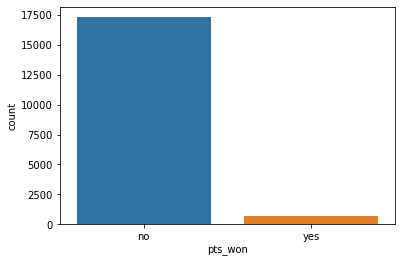

In [22]:
sns.countplot(x='pts_won', data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

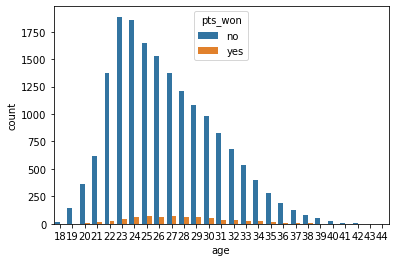

In [23]:
sns.countplot(x='age', data=data, hue='pts_won')

<AxesSubplot:xlabel='team', ylabel='count'>

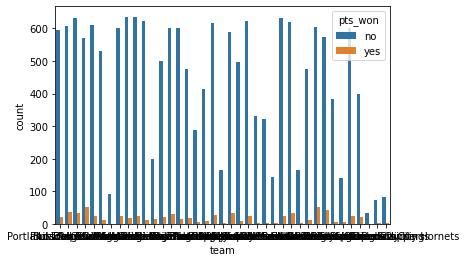

In [24]:
sns.countplot(x='team', data=data, hue='pts_won')

<AxesSubplot:xlabel='pts_won', ylabel='fg%'>

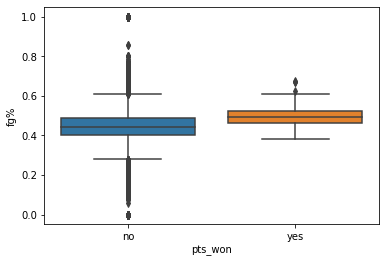

In [25]:
sns.boxplot(x='pts_won', y='fg%', data=data)

<AxesSubplot:xlabel='pts_won', ylabel='ast'>

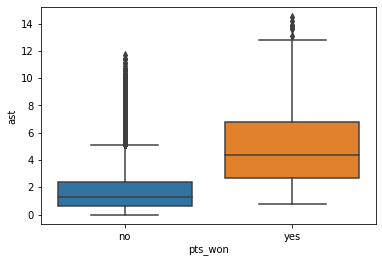

In [26]:
sns.boxplot(x='pts_won', y='ast', data=data)

<AxesSubplot:xlabel='pts_won', ylabel='blk'>

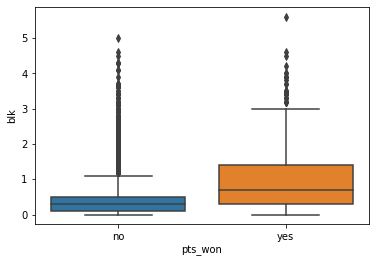

In [27]:
sns.boxplot(x='pts_won', y='blk', data=data)

<AxesSubplot:xlabel='pts_won', ylabel='g'>

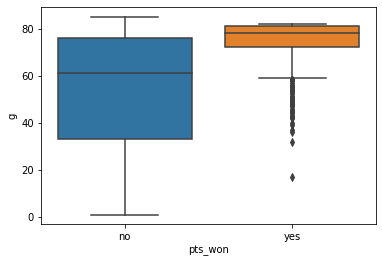

In [28]:
sns.boxplot(x='pts_won', y='g', data=data)

<AxesSubplot:xlabel='pts_won', ylabel='mp'>

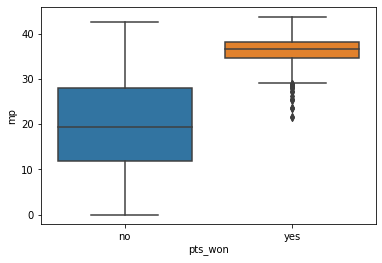

In [29]:
sns.boxplot(x='pts_won', y='mp', data=data)

<AxesSubplot:xlabel='pts_won', ylabel='w/l%'>

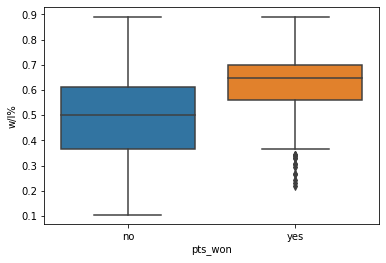

In [30]:
sns.boxplot(x='pts_won', y='w/l%', data=data)

<AxesSubplot:xlabel='pts_won', ylabel='trb'>

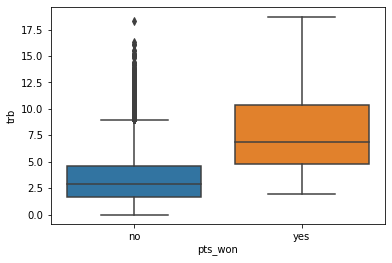

In [31]:
sns.boxplot(x='pts_won', y='trb', data=data)

<AxesSubplot:xlabel='pts_won', ylabel='stl'>

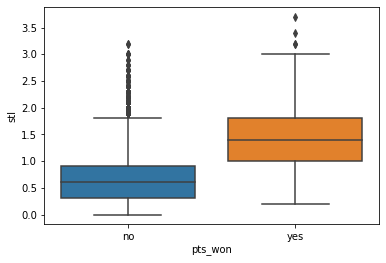

In [32]:
sns.boxplot(x='pts_won', y='stl', data=data)

<AxesSubplot:xlabel='pts_won', ylabel='pts'>

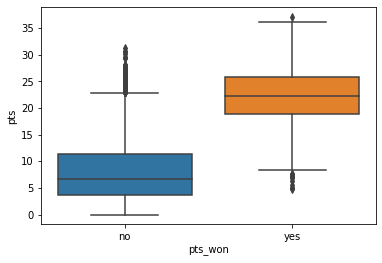

In [33]:
sns.boxplot(x='pts_won', y='pts', data=data)

In [34]:
#split feature columns and target column

In [35]:
x=data.drop(['tm', 'pts_won', 'player', 'year', 'wt', 'gs', 'fg', 'fga', '3pa', '2pa', 'ft', 'fta', 'ft%', 'orb', 'drb', 'pf', 'pts_max', 'share', 'efg%', '2p', '3p', '3p%', '2p%', 'tov', 'ht', 'pos', 'colleges', 'w', 'l', 'gb', 'ps/g', 'pa/g', 'srs'], axis = 1)

In [36]:
y=data['pts_won']

In [37]:
x.head()

,age,g,mp,fg%,trb,ast,stl,blk,pts,team,w/l%
0,22,43,6.7,0.474,2.1,0.3,0.1,0.3,3.1,Portland Trail Blazers,0.768
1,31,80,21.4,0.472,2.6,3.6,0.8,0.2,11.1,Portland Trail Blazers,0.768
2,25,53,14.7,0.488,3.6,0.5,0.3,0.2,5.1,Portland Trail Blazers,0.768
3,34,67,11.1,0.393,2.8,0.3,0.1,0.9,2.2,Portland Trail Blazers,0.768
4,36,71,20.9,0.468,2.5,1.8,1.1,0.0,13.0,Portland Trail Blazers,0.768


In [38]:
#initialize numericals and categoricals in order to scale and encode features

In [39]:
numericals=x[['age', 'mp', 'fg%', 'trb', 'ast', 'stl', 'blk', 'pts', 'w/l%']]

In [40]:
categoricals=x[['team']]

In [41]:
scaled = Normalizer().fit_transform(numericals)
scaled = pd.DataFrame(scaled)

In [42]:
scaled

,0,1,2,3,4,5,6,7,8
0,0.943316,0.287283,0.020324,0.090044,0.012863,0.004288,0.012863,0.132922,0.032930
1,0.784023,0.541229,0.011937,0.065757,0.091048,0.020233,0.005058,0.280731,0.019424
2,0.842143,0.495180,0.016439,0.121269,0.016843,0.010106,0.006737,0.171797,0.025871
3,0.945341,0.308626,0.010927,0.077852,0.008341,0.002780,0.025024,0.061169,0.021354
4,0.823017,0.477807,0.010699,0.057154,0.041151,0.025148,0.000000,0.297201,0.017558
...,...,...,...,...,...,...,...,...,...
17971,0.822123,0.548966,0.009919,0.058344,0.023868,0.013260,0.002652,0.135252,0.014241
17972,0.546075,0.748578,0.010262,0.052332,0.163823,0.034130,0.009101,0.332196,0.012218
17973,0.856788,0.491860,0.012058,0.079332,0.015866,0.006347,0.006347,0.130105,0.017041
17974,0.985927,0.150237,0.017606,0.046949,0.000000,0.000000,0.004695,0.046949,0.025212


In [43]:
encoded = OneHotEncoder(drop='first').fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded) 
encoded

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# combine scaled numericals and encoded categoricals as feature set

In [45]:
features = pd.concat([scaled, encoded], axis = 1)
features

,0,1,2,3,4,5,6,7,8,0,...,28,29,30,31,32,33,34,35,36,37
0,0.943316,0.287283,0.020324,0.090044,0.012863,0.004288,0.012863,0.132922,0.032930,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.784023,0.541229,0.011937,0.065757,0.091048,0.020233,0.005058,0.280731,0.019424,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.842143,0.495180,0.016439,0.121269,0.016843,0.010106,0.006737,0.171797,0.025871,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.945341,0.308626,0.010927,0.077852,0.008341,0.002780,0.025024,0.061169,0.021354,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.823017,0.477807,0.010699,0.057154,0.041151,0.025148,0.000000,0.297201,0.017558,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0.822123,0.548966,0.009919,0.058344,0.023868,0.013260,0.002652,0.135252,0.014241,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17972,0.546075,0.748578,0.010262,0.052332,0.163823,0.034130,0.009101,0.332196,0.012218,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17973,0.856788,0.491860,0.012058,0.079332,0.015866,0.006347,0.006347,0.130105,0.017041,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17974,0.985927,0.150237,0.017606,0.046949,0.000000,0.000000,0.004695,0.046949,0.025212,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.6, random_state=42)

In [47]:
#balance the unbalanced target column

In [48]:
data['pts_won'].value_counts()

no     17279
yes      697
Name: pts_won, dtype: int64

In [49]:
ros = RandomOverSampler(random_state=0)
X_train_resamp, y_train_resamp = ros.fit_resample(X_train, y_train)

In [50]:
y_train_resamp.value_counts()

no     6898
yes    6898
Name: pts_won, dtype: int64

In [51]:
#make the models and test accuracy

In [52]:
model = LogisticRegression().fit(X_train_resamp, y_train_resamp)
predictions = model.predict(X_test)

In [53]:
accuracy_score(y_test, predictions)

0.8829964769145188

In [54]:
confusion_matrix(y_test, predictions)

array([[9154, 1227],
       [  35,  370]])

In [55]:
dt = tree.DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [56]:
confusion_matrix(y_test, dt_pred)

array([[10150,   231],
       [  163,   242]])

In [57]:
accuracy_score(y_test, dt_pred)

0.9634711663267198

In [58]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
confusion_matrix(y_test, rf_pred)

array([[10336,    45],
       [  215,   190]])

In [59]:
accuracy_score(y_test, rf_pred)

0.9758946782866679